In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [16]:
data = pd.read_csv("creditcard.csv")
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Text(0,0.5,'Frequency')

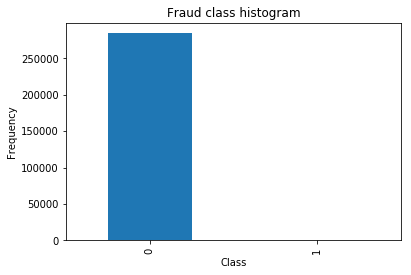

In [17]:
count_classes = pd.value_counts(data['Class'], sort = True).sort_index()#统计数量
count_classes.plot(kind = 'bar')
plt.title("Fraud class histogram")
plt.xlabel("Class")
plt.ylabel("Frequency")

In [18]:
from sklearn.preprocessing import StandardScaler

#对Amount列进行标准化处理
#StandardScaler是标准化类，
#fit_transform方法对数据进行某种统一处理（比如标准化~N(0,1)，将数据缩放(映射)到某个固定区间，归一化，正则化等）
data['normAmount'] = StandardScaler().fit_transform(data['Amount'].values.reshape(-1, 1))

data = data.drop(['Time','Amount'],axis=1)#删除Time和Amout列
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,normAmount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


In [20]:
X = data.iloc[:, data.columns != 'Class']
y = data.iloc[:, data.columns == 'Class']

In [21]:
# Number of data points in the minority class
number_records_fraud = len(data[data.Class == 1])#异常数据
fraud_indices = np.array(data[data.Class == 1].index)
number_records_fraud

492

In [14]:
fraud_indices

array([   541,    623,   4920,   6108,   6329,   6331,   6334,   6336,
         6338,   6427,   6446,   6472,   6529,   6609,   6641,   6717,
         6719,   6734,   6774,   6820,   6870,   6882,   6899,   6903,
         6971,   8296,   8312,   8335,   8615,   8617,   8842,   8845,
         8972,   9035,   9179,   9252,   9487,   9509,  10204,  10484,
        10497,  10498,  10568,  10630,  10690,  10801,  10891,  10897,
        11343,  11710,  11841,  11880,  12070,  12108,  12261,  12369,
        14104,  14170,  14197,  14211,  14338,  15166,  15204,  15225,
        15451,  15476,  15506,  15539,  15566,  15736,  15751,  15781,
        15810,  16415,  16780,  16863,  17317,  17366,  17407,  17453,
        17480,  18466,  18472,  18773,  18809,  20198,  23308,  23422,
        26802,  27362,  27627,  27738,  27749,  29687,  30100,  30314,
        30384,  30398,  30442,  30473,  30496,  31002,  33276,  39183,
        40085,  40525,  41395,  41569,  41943,  42007,  42009,  42473,
      

In [23]:
# Picking the indices of the normal classes
normal_indices = data[data.Class == 0].index#正常数据
normal_indices

Int64Index([     0,      1,      2,      3,      4,      5,      6,      7,
                 8,      9,
            ...
            284797, 284798, 284799, 284800, 284801, 284802, 284803, 284804,
            284805, 284806],
           dtype='int64', length=284315)

In [24]:
# Out of the indices we picked, randomly select "x" number (number_records_fraud)
random_normal_indices = np.random.choice(normal_indices, number_records_fraud, replace = False)#从正常数据中选择492，进行下采样操作
random_normal_indices = np.array(random_normal_indices)
random_normal_indices

array([ 41774, 126168, 208058,  38157, 190616, 232911, 271015, 209381,
       218420, 224846, 115706, 196038, 251578, 104674, 105398, 175133,
           92,   1227,  81627, 171786,  85181, 155544, 183532, 175225,
       120111,  73984,   7052, 139726, 137684, 104072, 134441, 258159,
       213297, 184983, 164650,  39338,  33994,  92828, 103443,  68802,
       271707,   5201,  65271,  93353, 269318, 141373, 109703, 269203,
        66491, 168367, 214473, 228251, 156913, 155707, 245017, 274948,
       120539, 269888,  43387, 206135, 123572,  57637, 190437,  57302,
       217345, 261815,  20472,  68113,  96943, 274860, 162253,  39600,
        56557, 217781,  44333,  22259,  41800, 236474, 265261, 151625,
        32726,   6883, 241013,  80717, 164007, 174507, 251663, 260792,
       120983, 138370, 155956,  49043, 107116, 107326, 197540,  11771,
       276842, 242312,  41743,  93596, 272789, 245141,  21325, 211095,
       116337, 242960, 259627,  31578,  80304, 161921, 153807, 112748,
      

In [26]:
len(random_normal_indices) 

492

In [27]:
# Appending the 2 indices
under_sample_indices = np.concatenate([fraud_indices,random_normal_indices])#合并异常数据与下采样选出来正常数据
under_sample_indices

array([   541,    623,   4920,   6108,   6329,   6331,   6334,   6336,
         6338,   6427,   6446,   6472,   6529,   6609,   6641,   6717,
         6719,   6734,   6774,   6820,   6870,   6882,   6899,   6903,
         6971,   8296,   8312,   8335,   8615,   8617,   8842,   8845,
         8972,   9035,   9179,   9252,   9487,   9509,  10204,  10484,
        10497,  10498,  10568,  10630,  10690,  10801,  10891,  10897,
        11343,  11710,  11841,  11880,  12070,  12108,  12261,  12369,
        14104,  14170,  14197,  14211,  14338,  15166,  15204,  15225,
        15451,  15476,  15506,  15539,  15566,  15736,  15751,  15781,
        15810,  16415,  16780,  16863,  17317,  17366,  17407,  17453,
        17480,  18466,  18472,  18773,  18809,  20198,  23308,  23422,
        26802,  27362,  27627,  27738,  27749,  29687,  30100,  30314,
        30384,  30398,  30442,  30473,  30496,  31002,  33276,  39183,
        40085,  40525,  41395,  41569,  41943,  42007,  42009,  42473,
      

In [29]:
len(under_sample_indices)

984

In [30]:
# Under sample dataset
under_sample_data = data.iloc[under_sample_indices,:]#根据下采样数据的索引从原来数据中选出
under_sample_data


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,normAmount
541,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,-2.772272,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,1,-0.353229
623,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,-0.838587,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,1,1.761758
4920,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,-1.525412,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,1,0.606031
6108,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,-4.801637,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,1,-0.117342
6329,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,-2.447469,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1,-0.349231
6331,0.008430,4.137837,-6.240697,6.675732,0.768307,-3.353060,-1.631735,0.154612,-2.795892,-6.187891,...,0.364514,-0.608057,-0.539528,0.128940,1.488481,0.507963,0.735822,0.513574,1,-0.349231
6334,0.026779,4.132464,-6.560600,6.348557,1.329666,-2.513479,-1.689102,0.303253,-3.139409,-6.045468,...,0.370509,-0.576752,-0.669605,-0.759908,1.605056,0.540675,0.737040,0.496699,1,-0.349231
6336,0.329594,3.712889,-5.775935,6.078266,1.667359,-2.420168,-0.812891,0.133080,-2.214311,-5.134454,...,0.156617,-0.652450,-0.551572,-0.716522,1.415717,0.555265,0.530507,0.404474,1,-0.349231
6338,0.316459,3.809076,-5.615159,6.047445,1.554026,-2.651353,-0.746579,0.055586,-2.678679,-4.959493,...,0.208828,-0.511747,-0.583813,-0.219845,1.474753,0.491192,0.518868,0.402528,1,-0.349231
6427,0.725646,2.300894,-5.329976,4.007683,-1.730411,-1.732193,-3.968593,1.063728,-0.486097,-4.624985,...,0.589669,0.109541,0.601045,-0.364700,-1.843078,0.351909,0.594550,0.099372,1,-0.349231


In [31]:
X_undersample = under_sample_data.iloc[:, under_sample_data.columns != 'Class']#下采样中的X
y_undersample = under_sample_data.iloc[:, under_sample_data.columns == 'Class']#下采样数据中的Y

In [32]:
# Showing ratio
print("Percentage of normal transactions: ", len(under_sample_data[under_sample_data.Class == 0])/len(under_sample_data))
print("Percentage of fraud transactions: ", len(under_sample_data[under_sample_data.Class == 1])/len(under_sample_data))
print("Total number of transactions in resampled data: ", len(under_sample_data))

Percentage of normal transactions:  0.5
Percentage of fraud transactions:  0.5
Total number of transactions in resampled data:  984


In [35]:
from sklearn.cross_validation import train_test_split#采用交叉验证

# Whole dataset
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 0)#对原始数据进行切分，验证集占30%

print("Number transactions train dataset: ", len(X_train))
print("Number transactions test dataset: ", len(X_test))
print("Total number of transactions: ", len(X_train)+len(X_test))


Number transactions train dataset:  199364
Number transactions test dataset:  85443
Total number of transactions:  284807


In [36]:
# Undersampled dataset
#对下采样数据进行切分
X_train_undersample, X_test_undersample, y_train_undersample, y_test_undersample = train_test_split(X_undersample
                                                                                                   ,y_undersample
                                                                                                   ,test_size = 0.3
                                                                                                   ,random_state = 0)
print("")
print("Number transactions train dataset: ", len(X_train_undersample))
print("Number transactions test dataset: ", len(X_test_undersample))
print("Total number of transactions: ", len(X_train_undersample)+len(X_test_undersample))


Number transactions train dataset:  688
Number transactions test dataset:  296
Total number of transactions:  984


In [37]:
#Recall = TP/(TP+FN)召回率计算公式
from sklearn.linear_model import LogisticRegression#逻辑回归
from sklearn.cross_validation import KFold, cross_val_score#交叉验证
from sklearn.metrics import confusion_matrix,recall_score,classification_report #混淆矩阵

In [38]:
y_train_undersample

,Class
6870,1
179264,0
258159,0
214775,1
149145,1
15781,1
11710,1
10706,0
247288,0
92828,0


In [40]:
f = KFold(len(y_train_undersample),5,shuffle=False)#对下采样数据的训练集划分为五部分
f

sklearn.cross_validation.KFold(n=688, n_folds=5, shuffle=False, random_state=None)

In [142]:
for iteration, indices in enumerate(f,start=1):#用交叉验证来寻找最优模型，一共五组数据集，训练出五组模型，进行求均值
    print(indices)#indices是一个元组，元组里包含两个数组，第一个数组是训练集的索引，占五分之四;第二个数组是预测集的索引,占五分之一


(array([138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150,
       151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163,
       164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176,
       177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189,
       190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202,
       203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215,
       216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228,
       229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241,
       242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254,
       255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267,
       268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280,
       281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293,
       294, 295, 296, 297, 298, 299, 300, 301, 302, 303, 304, 305, 306,
       307, 308, 309, 310, 311, 312, 313, 314, 315, 316, 317, 3

In [41]:
def printing_Kfold_scores(x_train_data,y_train_data):
    fold = KFold(len(y_train_data),5,shuffle=False) #交叉验证的数据集分为五组
    print(type(fold))
    # Different C parameters
    c_param_range = [0.01,0.1,1,10,100]#正则化项的系数

    results_table = pd.DataFrame(index = range(len(c_param_range),2), columns = ['C_parameter','Mean recall score'])
    results_table['C_parameter'] = c_param_range

    # the k-fold will give 2 lists: train_indices = indices[0], test_indices = indices[1]
    j = 0
    for c_param in c_param_range:#循环正则化项系数，找出最好的系数
        print('-------------------------------------------')
        print('C parameter: ', c_param)
        print('-------------------------------------------')
        print('')

        recall_accs = []#召回率列表
        for iteration, indices in enumerate(fold,start=1):#用交叉验证来寻找最优模型，一共五组数据集，训练出五组模型，进行求均值
            #print(indices)
            #print(type(indices))
            # Call the logistic regression model with a certain C parameter
            lr = LogisticRegression(C = c_param, penalty = 'l1')#建立逻辑回归模型，传入需要的参数，C为正则项系数，penalty为范式

            # Use the training data to fit the model. In this case, we use the portion of the fold to train the model
            # with indices[0]. We then predict on the portion assigned as the 'test cross validation' with indices[1]
            #使用训练数据来拟合模型。 在这种情况下，我们使用折叠的部分来训练具有indices[0]的模型。
            #然后，我们使用indices[1]预测指定为“测试交叉验证”的部分
            lr.fit(x_train_data.iloc[indices[0],:],y_train_data.iloc[indices[0],:].values.ravel())#训练数据集得到模型

            # Predict values using the test indices in the training data
            y_pred_undersample = lr.predict(x_train_data.iloc[indices[1],:].values)#用训练出来的模型进行预测

            # Calculate the recall score and append it to a list for recall scores representing the current c_parameter
            #计算召回率并将其附加到表示当前c_parameter的召回率列表中
            recall_acc = recall_score(y_train_data.iloc[indices[1],:].values,y_pred_undersample)
            recall_accs.append(recall_acc)#将召回率填到里表中
            print('Iteration ', iteration,': recall score = ', recall_acc)

        # The mean value of those recall scores is the metric we want to save and get hold of.
        results_table.loc[j,'Mean recall score'] = np.mean(recall_accs)#计算当前正则项系数下的，五次模型的平均召回率
        j += 1
        print('')
        print('Mean recall score ', np.mean(recall_accs))
        print('')
    #print(results_table['Mean recall score'].dtype)
    #results_table['Mean recall_score']
    best_c = results_table.loc[results_table['Mean recall score'].astype(float).idxmax()]['C_parameter']#找出最好的正则化项参数
    
    # Finally, we can check which C parameter is the best amongst the chosen.
    print('*********************************************************************************')
    print('Best model to choose from cross validation is with C parameter = ', best_c)
    print('*********************************************************************************')
    print(results_table)
    return best_c

In [46]:
best_c = printing_Kfold_scores(X_train_undersample,y_train_undersample)

<class 'sklearn.cross_validation.KFold'>
-------------------------------------------
C parameter:  0.01
-------------------------------------------

Iteration  1 : recall score =  0.9315068493150684
Iteration  2 : recall score =  0.9178082191780822
Iteration  3 : recall score =  1.0
Iteration  4 : recall score =  0.9594594594594594
Iteration  5 : recall score =  0.9696969696969697

Mean recall score  0.955694299529916

-------------------------------------------
C parameter:  0.1
-------------------------------------------

Iteration  1 : recall score =  0.8493150684931506
Iteration  2 : recall score =  0.863013698630137
Iteration  3 : recall score =  0.9152542372881356
Iteration  4 : recall score =  0.9324324324324325
Iteration  5 : recall score =  0.8787878787878788

Mean recall score  0.8877606631263468

-------------------------------------------
C parameter:  1
-------------------------------------------

Iteration  1 : recall score =  0.8493150684931506
Iteration  2 : recall scor

In [47]:
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.#绘制混淆矩阵
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)#cm要绘制的图像或数组。interpolation是插值，cmap是颜色图谱
    plt.title(title)
    plt.colorbar()#当我们给图配渐变色时，常常需要在图旁边把colorbar显示出来
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=10)#tick_marks是刻标，classes是标签,rotation旋转角度
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()#当你拥有多个子图时，你会经常看到不同轴域的标签叠在一起。tight_layout()也会调整子图之间的间隔来减少堆叠。
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [50]:
f= confusion_matrix(y_test_undersample,y_pred_undersample)
f

array([[138,  11],
       [ 10, 137]], dtype=int64)

In [51]:
f.max()

138

In [52]:
f.shape[0]

2

In [53]:
for i, j in itertools.product(range(2), range(2)):
    print(i,j)

0 0
0 1
1 0
1 1


In [54]:
for j in itertools.product(range(2), range(2)):
    print(j)

(0, 0)
(0, 1)
(1, 0)
(1, 1)


Recall metric in the testing dataset:  0.9319727891156463


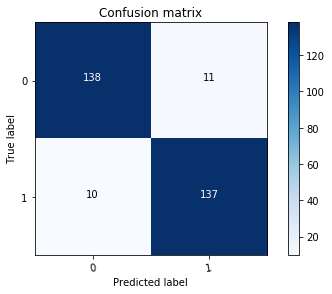

In [49]:
import itertools
lr = LogisticRegression(C = best_c, penalty = 'l1')
lr.fit(X_train_undersample,y_train_undersample.values.ravel())#训练下采样数据集，得到模型
y_pred_undersample = lr.predict(X_test_undersample.values)#预测下采样数据的测试集的Y值

# Compute confusion matrix计算混淆矩阵
cnf_matrix = confusion_matrix(y_test_undersample,y_pred_undersample)
#sklearn.metrics.confusion_matrix(y_true, y_pred, labels=None, sample_weight=None)
#y_true: 是样本真实分类结果，y_pred: 是样本预测分类结果 
#labels：是所给出的类别，通过这个可对类别进行选择 
#sample_weight : 样本权重

##Recall = TP/(TP+FN)召回率计算公式
print("Recall metric in the testing dataset: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))

# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix
                      , classes=class_names
                      , title='Confusion matrix')
plt.show()

Recall metric in the testing dataset:  0.9183673469387755


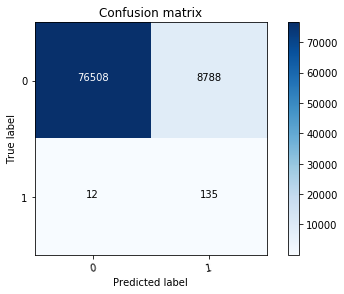

In [56]:
lr = LogisticRegression(C = best_c, penalty = 'l1')
lr.fit(X_train_undersample,y_train_undersample.values.ravel())
y_pred = lr.predict(X_test.values)#预测原始数据的测试集的Y值

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test,y_pred)
np.set_printoptions(precision=2)#设置打印选项

print("Recall metric in the testing dataset: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))

# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix
                      , classes=class_names
                      , title='Confusion matrix')
plt.show()

In [57]:
best_c = printing_Kfold_scores(X_train,y_train)#原始数据

<class 'sklearn.cross_validation.KFold'>
-------------------------------------------
C parameter:  0.01
-------------------------------------------

Iteration  1 : recall score =  0.4925373134328358
Iteration  2 : recall score =  0.6027397260273972
Iteration  3 : recall score =  0.6833333333333333
Iteration  4 : recall score =  0.5692307692307692
Iteration  5 : recall score =  0.45

Mean recall score  0.5595682284048672

-------------------------------------------
C parameter:  0.1
-------------------------------------------

Iteration  1 : recall score =  0.5671641791044776
Iteration  2 : recall score =  0.6164383561643836
Iteration  3 : recall score =  0.6833333333333333
Iteration  4 : recall score =  0.5846153846153846
Iteration  5 : recall score =  0.525

Mean recall score  0.5953102506435158

-------------------------------------------
C parameter:  1
-------------------------------------------

Iteration  1 : recall score =  0.5522388059701493
Iteration  2 : recall score =  0.616

Recall metric in the testing dataset:  0.6190476190476191


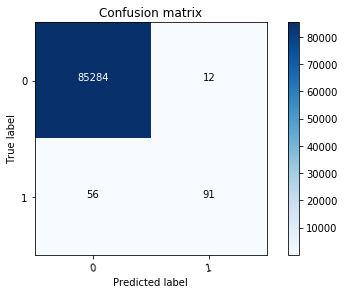

In [58]:
lr = LogisticRegression(C = best_c, penalty = 'l1')
lr.fit(X_train,y_train.values.ravel())#训练原始数据的训练集
y_pred_undersample = lr.predict(X_test.values)#预测原始数据集的测试集

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test,y_pred_undersample)
np.set_printoptions(precision=2)

print("Recall metric in the testing dataset: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))

# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix
                      , classes=class_names
                      , title='Confusion matrix')
plt.show()

[[0.55 0.45]
 [0.62 0.38]
 [0.   1.  ]
 [0.56 0.44]
 [0.62 0.38]]
Recall metric in the testing dataset:  1.0
[[0.55 0.45]
 [0.62 0.38]
 [0.   1.  ]
 [0.56 0.44]
 [0.62 0.38]]
Recall metric in the testing dataset:  1.0
[[0.55 0.45]
 [0.62 0.38]
 [0.   1.  ]
 [0.56 0.44]
 [0.62 0.38]]
Recall metric in the testing dataset:  1.0
[[0.55 0.45]
 [0.62 0.38]
 [0.   1.  ]
 [0.56 0.44]
 [0.62 0.38]]
Recall metric in the testing dataset:  0.9727891156462585
[[0.55 0.45]
 [0.62 0.38]
 [0.   1.  ]
 [0.56 0.44]
 [0.62 0.38]]
Recall metric in the testing dataset:  0.9319727891156463
[[0.55 0.45]
 [0.62 0.38]
 [0.   1.  ]
 [0.56 0.44]
 [0.62 0.38]]
Recall metric in the testing dataset:  0.8639455782312925
[[0.55 0.45]
 [0.62 0.38]
 [0.   1.  ]
 [0.56 0.44]
 [0.62 0.38]]
Recall metric in the testing dataset:  0.8231292517006803
[[0.55 0.45]
 [0.62 0.38]
 [0.   1.  ]
 [0.56 0.44]
 [0.62 0.38]]
Recall metric in the testing dataset:  0.7414965986394558
[[0.55 0.45]
 [0.62 0.38]
 [0.   1.  ]
 [0.56 0.44]
 

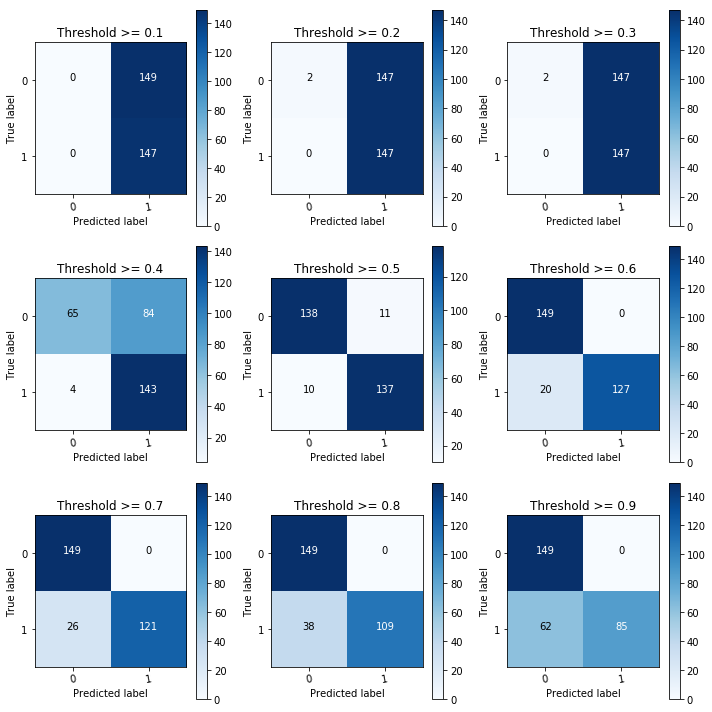

In [61]:
lr = LogisticRegression(C = 0.01, penalty = 'l1')
lr.fit(X_train_undersample,y_train_undersample.values.ravel())#下采样数据训练出来的模型
#predict_proba返回的是一个 n 行 k 列的数组， 第 i 行 第 j 列上的数值是模型预测 第 i 个预测样本为某个标签的概率，并且每一行的概率和为1。
y_pred_undersample_proba = lr.predict_proba(X_test_undersample.values)



thresholds = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]#自己设置阈值

plt.figure(figsize=(10,10))

j = 1
#随着阈值的升高，召回率越来越低，具体看打印结果
for i in thresholds:
    y_test_predictions_high_recall = y_pred_undersample_proba[:,1] > i#预测结果的概率是否大于阈值
    print( y_pred_undersample_proba[:5])
    
    plt.subplot(3,3,j)
    j += 1
    
    # Compute confusion matrix
    cnf_matrix = confusion_matrix(y_test_undersample,y_test_predictions_high_recall)
    np.set_printoptions(precision=2)

    print("Recall metric in the testing dataset: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))

    # Plot non-normalized confusion matrix
    class_names = [0,1]
    plot_confusion_matrix(cnf_matrix
                          , classes=class_names
                          , title='Threshold >= %s'%i) 

In [77]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

In [82]:
credit_cards=pd.read_csv('creditcard.csv')
columns=credit_cards.columns
columns#Index对象

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [83]:
# The labels are in the last column ('Class'). Simply remove it to obtain features columns
features_columns=columns.delete(len(columns)-1)
features_columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')

In [84]:
features=credit_cards[features_columns]#特征
labels=credit_cards['Class']#标签

In [85]:
features_train, features_test, labels_train, labels_test = train_test_split(features, 
                                                                            labels, 
                                                                            test_size=0.2, 
                                                                            random_state=0)

In [86]:
oversampler=SMOTE(random_state=0)#创建SMOTE实例
os_features,os_labels=oversampler.fit_sample(features_train,labels_train)#为少数类样本合成新样本

In [87]:
len(os_labels[os_labels==1])

227454

In [88]:
os_features = pd.DataFrame(os_features)
os_labels = pd.DataFrame(os_labels)
best_c = printing_Kfold_scores(os_features,os_labels)

<class 'sklearn.cross_validation.KFold'>
-------------------------------------------
C parameter:  0.01
-------------------------------------------

Iteration  1 : recall score =  0.8903225806451613
Iteration  2 : recall score =  0.8947368421052632
Iteration  3 : recall score =  0.968861347792409
Iteration  4 : recall score =  0.9577714028203691
Iteration  5 : recall score =  0.958386915949484

Mean recall score  0.9340158178625373

-------------------------------------------
C parameter:  0.1
-------------------------------------------

Iteration  1 : recall score =  0.8903225806451613
Iteration  2 : recall score =  0.8947368421052632
Iteration  3 : recall score =  0.9704547969458891
Iteration  4 : recall score =  0.9600575944427957
Iteration  5 : recall score =  0.9606071597366483

Mean recall score  0.9352357947751514

-------------------------------------------
C parameter:  1
-------------------------------------------

Iteration  1 : recall score =  0.8903225806451613
Iteration  

Recall metric in the testing dataset:  0.900990099009901


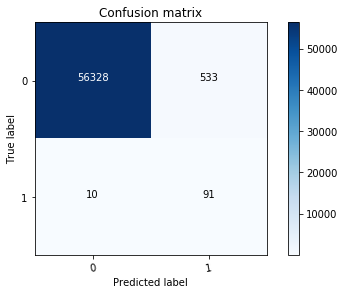

In [89]:
lr = LogisticRegression(C = best_c, penalty = 'l1')
lr.fit(os_features,os_labels.values.ravel())
y_pred = lr.predict(features_test.values)

# Compute confusion matrix
cnf_matrix = confusion_matrix(labels_test,y_pred)
np.set_printoptions(precision=2)

print("Recall metric in the testing dataset: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))

# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix
                      , classes=class_names
                      , title='Confusion matrix')
plt.show()